In [4]:
# @title #Importing liberaries

#importing liberaries
from IPython.display import clear_output
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

def inf(msg, style, width):
  inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=width))
  clear_output()
  display(inf)

inf('\u2714 install lib Complete!!! ','success', '300px')

Button(button_style='success', description='✔ install lib Complete!!! ', disabled=True, layout=Layout(min_widt…

In [6]:
# @title #Pull Data For ML

!git clone https://github.com/akaddman/ml_data.git

inf('\u2714 Clone data Complete!!! ','success', '300px')

Button(button_style='success', description='✔ Clone data Complete!!! ', disabled=True, layout=Layout(min_width…

In [122]:
#reading the datase

csv_files = [
    '/content/ml_data/BearHugCafe-เมือง-เชียงใหม่.csv',
    '/content/ml_data/คณะมนุษยศาสตร์-มช-HB5-เชียงใหม่.csv',
    '/content/ml_data/ชุมชนวัดเกต-เมือง-เชียงใหม่.csv']

df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
#extracting the data for date and AQI
dfd=df[ ['Timestamp','PM25'] ].reset_index()
dfd=dfd.drop(labels='index', axis=1)
# print(df) # dfd.info()
print(dfd.shape)
dfd.head(5)

(49829, 2)


,Timestamp,PM25
0,10/13/2023 15:00,18.0
1,10/13/2023 14:00,16.0
2,10/13/2023 13:00,12.0
3,10/13/2023 12:00,14.0
4,10/13/2023 11:00,13.0


In [123]:
#converting the same to data object
dfd['Timestamp']=pd.to_datetime(dfd['Timestamp'])
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49829 entries, 0 to 49828
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  38719 non-null  datetime64[ns]
 1   PM25       38719 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 778.7 KB


In [34]:
# mask = (df['Timestamp'] > '2022-01-01')
# df.loc[mask]
# df = df.loc[mask]
# dfd=df[ ['Timestamp','PM25'] ].reset_index()
# dfd=dfd.drop(labels='index', axis=1)

<Axes: title={'center': 'Primary Graph-PM2.5'}, xlabel='Timestamp'>

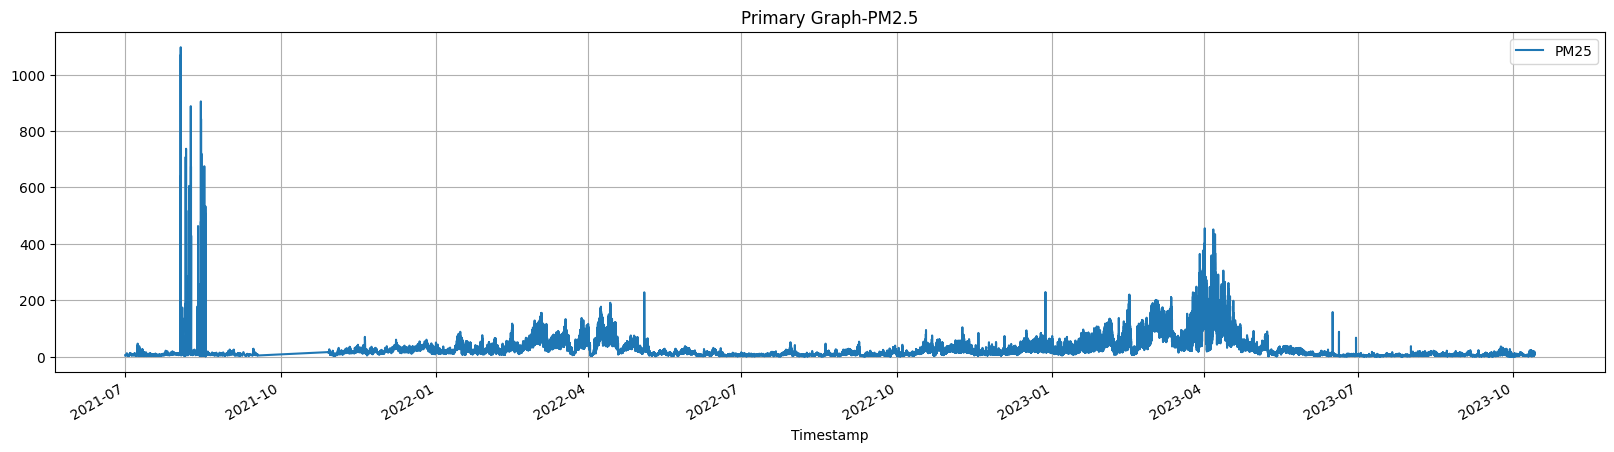

In [124]:
dfd.plot(x='Timestamp', y='PM25',kind='line',
        title="Primary Graph-PM2.5", grid= True, figsize=(20, 5))

In [119]:
dfd.isna().sum()
dfd.head(10)


,ds,y
0,2023-10-13 15:00:00,18.0
1,2023-10-13 14:00:00,16.0
2,2023-10-13 13:00:00,12.0
3,2023-10-13 12:00:00,14.0
4,2023-10-13 11:00:00,13.0
5,2023-10-13 10:00:00,11.0
6,2023-10-13 09:00:00,10.0
7,2023-10-13 08:00:00,11.0
8,2023-10-13 07:00:00,12.0
9,2023-10-13 06:00:00,12.0


In [125]:
#collapse_show
#creating a function to extract different date parameters
def date_feature(df, label=None):
    df= df.copy()

    df['date']= df['Timestamp']
    df['month']=df['Timestamp'].dt.strftime('%B')
    df['year']=df['Timestamp'].dt.strftime('%Y')
    df['dayofweek']=df['Timestamp'].dt.strftime('%A')
    df['quarter']=df['Timestamp'].dt.quarter
    df['dayofyear']=df['Timestamp'].dt.dayofyear
    df['dayofmonth']=df['Timestamp'].dt.day
    df['weekofyear']=df['Timestamp'].dt.weekofyear
    X= df[['date','month','year','dayofweek','quarter','dayofyear','dayofmonth','weekofyear']]

    if label:
        y= df[label]
        return X, y
    return X

X, y= date_feature(dfd, label='PM25')

<ipython-input-125-454f12884a2b>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear']=df['Timestamp'].dt.weekofyear


In [126]:
df_new=pd.concat([X,y], axis=1)
df_new.head()

,date,month,year,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,PM25
0,2023-10-13 15:00:00,October,2023,Friday,4.0,286.0,13.0,41.0,18.0
1,2023-10-13 14:00:00,October,2023,Friday,4.0,286.0,13.0,41.0,16.0
2,2023-10-13 13:00:00,October,2023,Friday,4.0,286.0,13.0,41.0,12.0
3,2023-10-13 12:00:00,October,2023,Friday,4.0,286.0,13.0,41.0,14.0
4,2023-10-13 11:00:00,October,2023,Friday,4.0,286.0,13.0,41.0,13.0


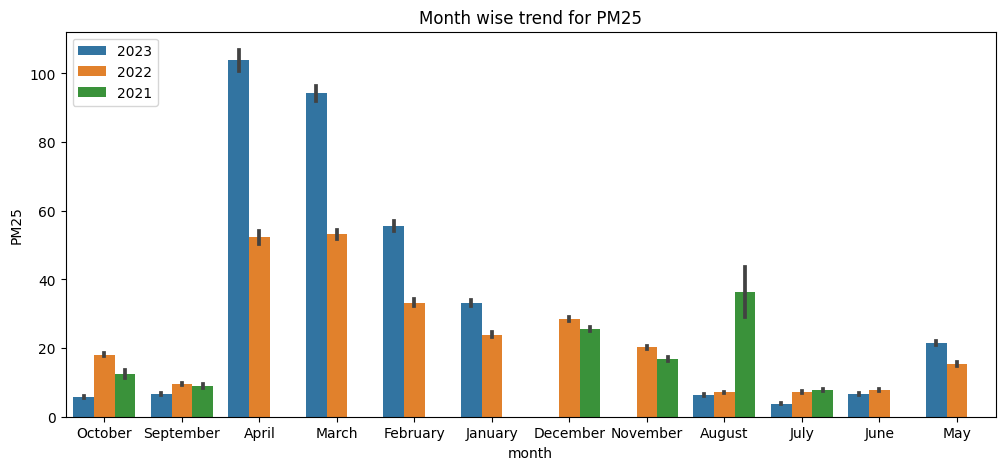

In [127]:
#collapse_show
# Plotting different features to  see differnet trends
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
a=sns.barplot(data=df_new, x='month', y='PM25', hue='year')
a.set_title("Month wise trend for PM25")
plt.legend(loc='best')
plt.show()

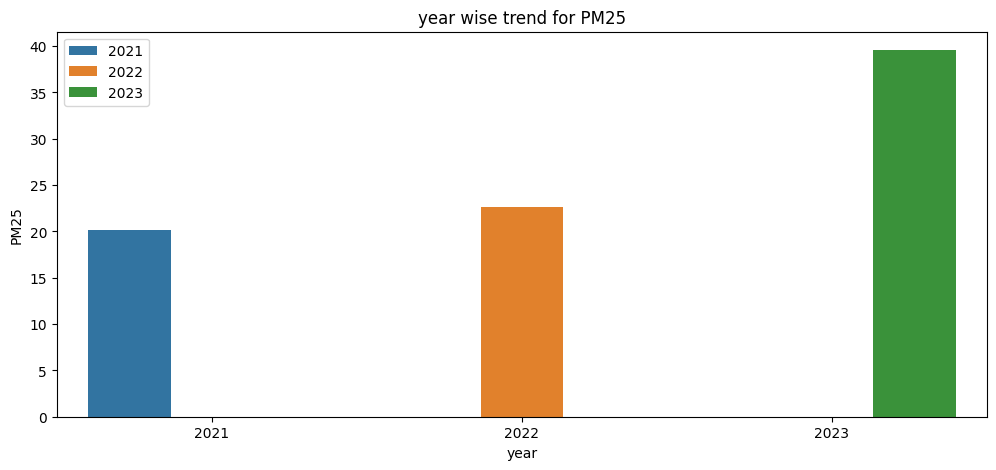

In [113]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new.groupby('year')['PM25'].mean().sort_values(ascending=True).reset_index()
a=sns.barplot(data=df_agg, x='year', y='PM25', hue='year')
a.set_title("year wise trend for PM25")
plt.legend(loc='best')
plt.show()

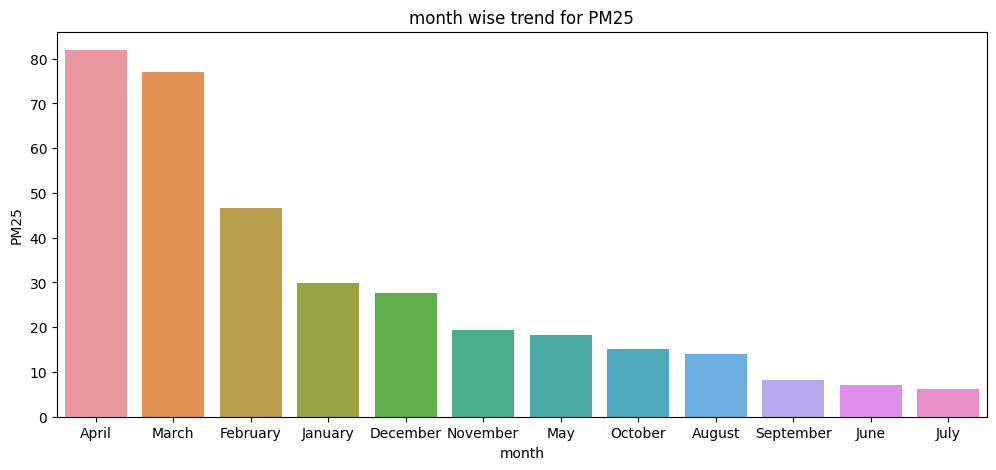

In [107]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new.groupby('month')['PM25'].mean().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='month', y='PM25')
a.set_title("month wise trend for PM25")
plt.show()

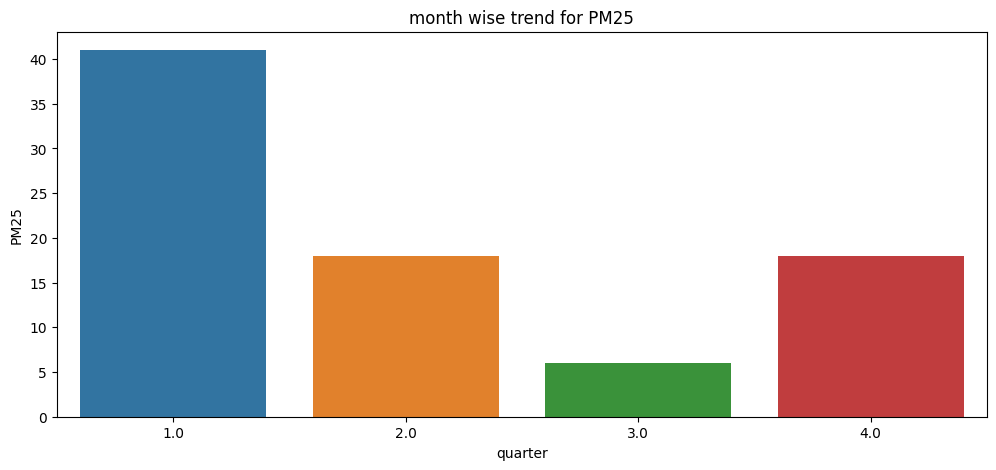

In [83]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new.groupby('quarter')['PM25'].median().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='quarter', y='PM25')
a.set_title("month wise trend for PM25")
plt.show()

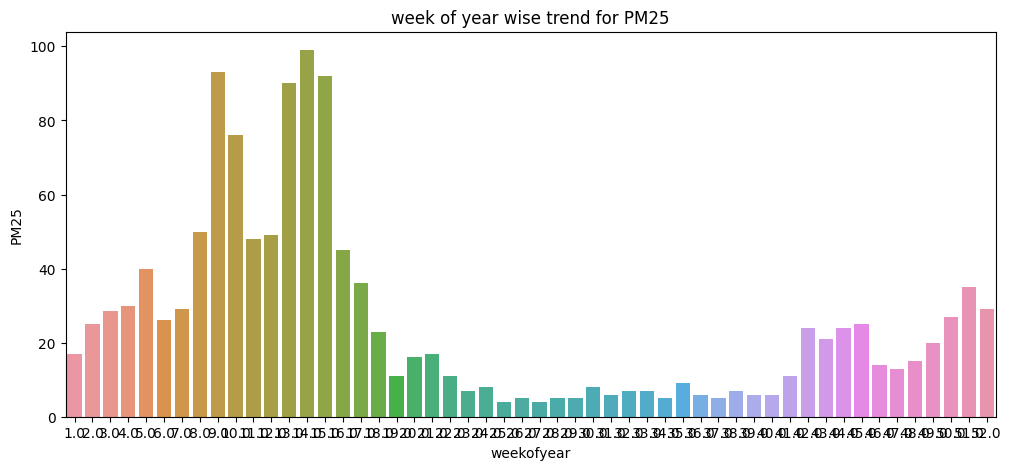

In [87]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new.groupby('weekofyear')['PM25'].median().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='weekofyear', y='PM25')
a.set_title("week of year wise trend for PM25")
#plt.legend(loc='best')
plt.show()

In [128]:
from sklearn.linear_model import LinearRegression

In [134]:
df_patient=pd.read_csv('/content/ml_data/icd-10-maung-chingmai-2019-2023.csv')
df_patient.head(3)

,yearmonth,patient
0,1/1/2019,2681.0
1,2/1/2019,2165.0
2,3/1/2019,1456.0


In [137]:
dfd_patient=df_patient[['yearmonth','patient']].reset_index()
dfd_patient=dfd_patient.drop(labels='index', axis=1)

#collapse_show
#converting the same to data object
dfd_patient['yearmonth']=pd.to_datetime(df['yearmonth'])
dfd_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   yearmonth  56 non-null     datetime64[ns]
 1   patient    56 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


<Axes: title={'center': 'Primary Graph-Patient vs year'}, xlabel='yearmonth'>

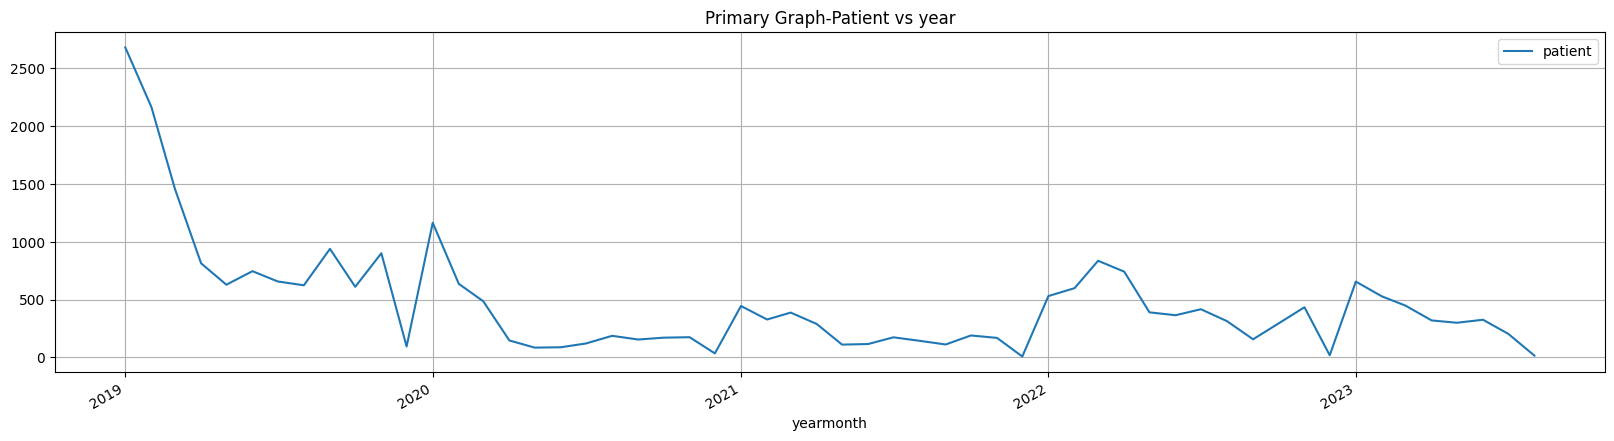

In [139]:
#collapse_show
#plotting the time series data using matplotlib
dfd_patient.plot(x='yearmonth', y='patient',kind='line',
        title="Primary Graph-Patient vs year", grid= True, figsize=(20, 5))

In [143]:
#collapse_show
#creating a function to extract different date parameters
def date_feature_patient(df, label=None):
    df= df.copy()

    df['month']=df['yearmonth'].dt.strftime('%B')
    df['year']=df['yearmonth'].dt.strftime('%Y')
    df['quarter']=df['yearmonth'].dt.quarter
    X= df[['month','year','quarter']]
    if label:
        y= df[label]
        return X, y
    return X
X_patient, y_patient= date_feature_patient(dfd_patient, label='patient')

In [146]:
df_new_patient=pd.concat([X_patient,y_patient], axis=1)
df_new_patient.head(5)

,month,year,quarter,patient
0,January,2019,1.0,2681.0
1,February,2019,1.0,2165.0
2,March,2019,1.0,1456.0
3,April,2019,2.0,814.0
4,May,2019,2.0,629.0


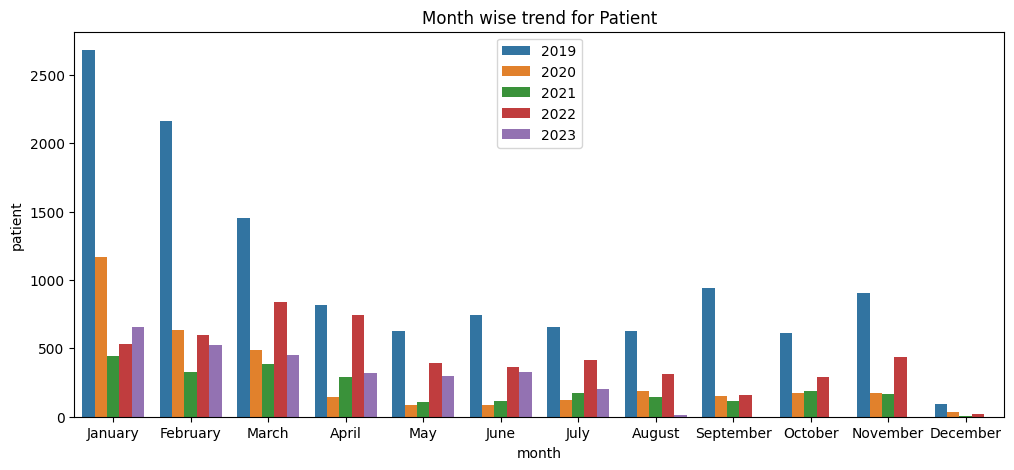

In [148]:
#collapse_show
# Plotting different features to  see differnet trends
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
a=sns.barplot(data=df_new_patient, x='month', y='patient', hue='year')
a.set_title("Month wise trend for Patient")
plt.legend(loc='best')
plt.show()

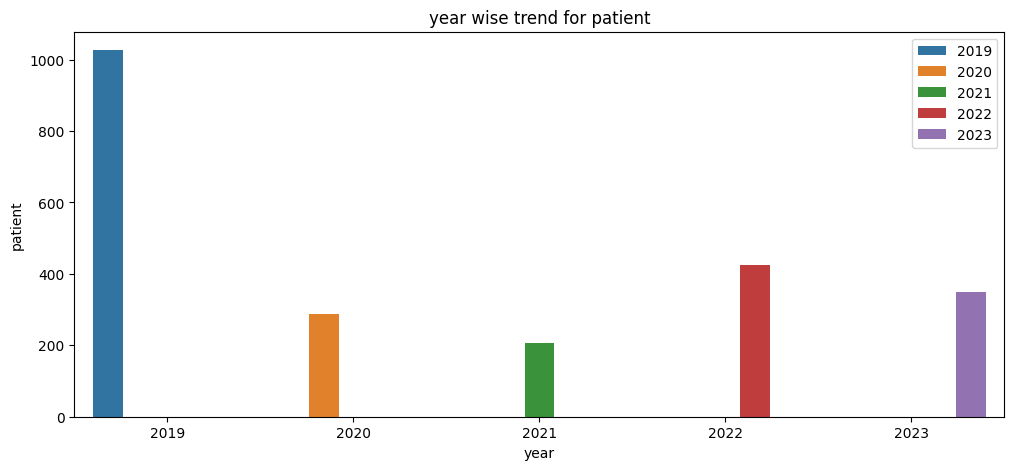

In [149]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new_patient.groupby('year')['patient'].mean().reset_index()
a=sns.barplot(data=df_agg, x='year', y='patient', hue='year')
a.set_title("year wise trend for patient")
plt.legend(loc='best')
plt.show()

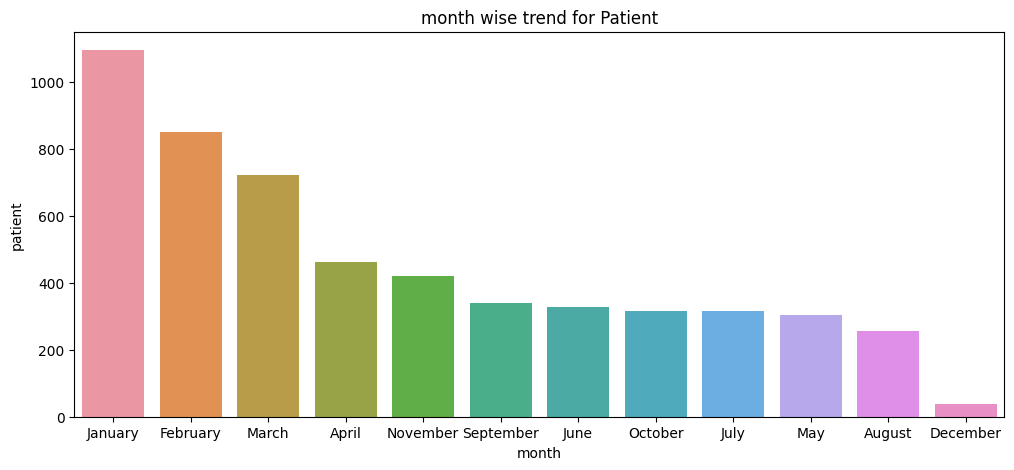

In [150]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new_patient.groupby('month')['patient'].mean().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='month', y='patient')
a.set_title("month wise trend for Patient")
#plt.legend(loc='best')
plt.show()

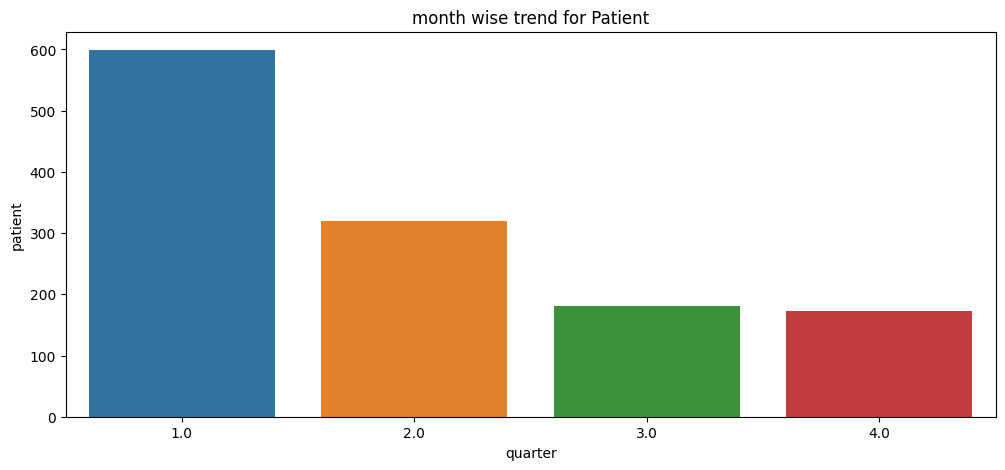

In [151]:
#collapse_show
plt.figure(figsize=(12,5))
pallette= sns.color_palette("mako_r", 4)
df_agg=df_new_patient.groupby('quarter')['patient'].median().sort_values(ascending=False).reset_index()
a=sns.barplot(data=df_agg, x='quarter', y='patient')
a.set_title("month wise trend for Patient")
#plt.legend(loc='best')
plt.show()

In [152]:
import sklearn as sk
from prophet import Prophet

In [154]:
model = Prophet()